In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from IPython.display import Markdown, display

In [2]:
def printm(x):
    display(Markdown(x))

In [3]:
df=pd.read_csv("exams.csv")

**EDA**

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.819398,0.805944
reading score,0.819398,1.000000,0.954274
writing score,0.805944,0.954274,1.000000


In [8]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


**DATA VİSUALIZATION**

In [9]:
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
num_cols = ['math score', 'reading score', 'writing score']

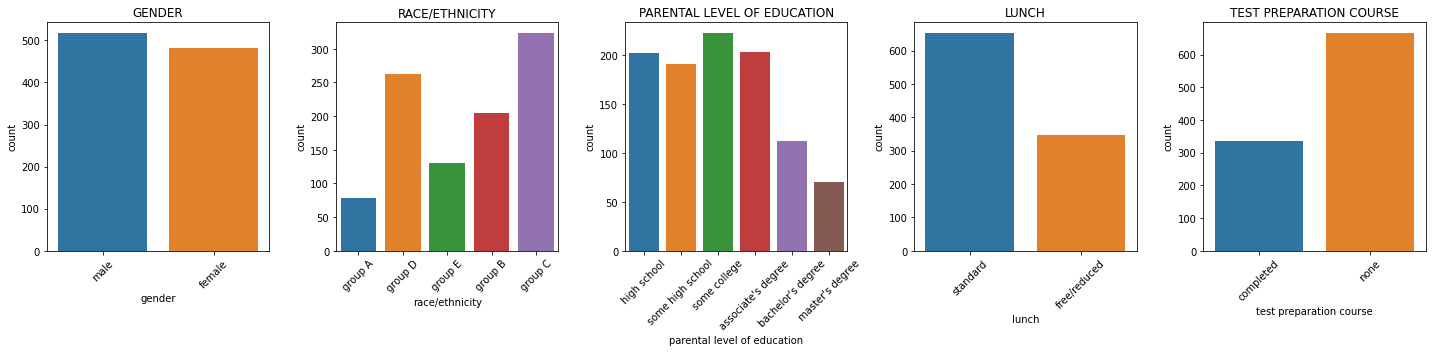

In [10]:
fix, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=5)

for i,col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=ax[i])
    ax[i].tick_params(axis='x', rotation=45) 
    ax[i].set_title(col.upper())

plt.tight_layout()
plt.show()

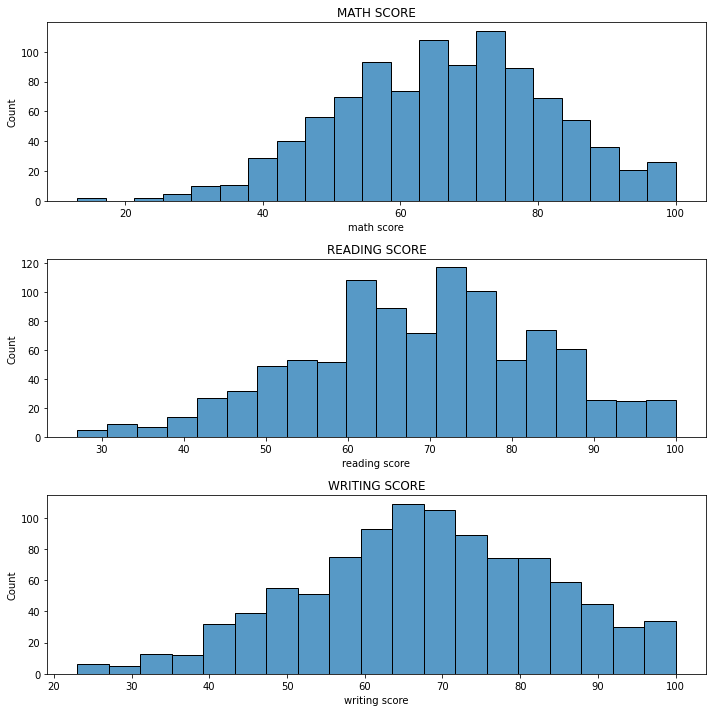

In [11]:
fix, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=1)

for i,col in enumerate(num_cols):
    sns.histplot(data=df, x=col, ax=ax[i])
    ax[i].set_title(col.upper())

plt.tight_layout()
plt.show()

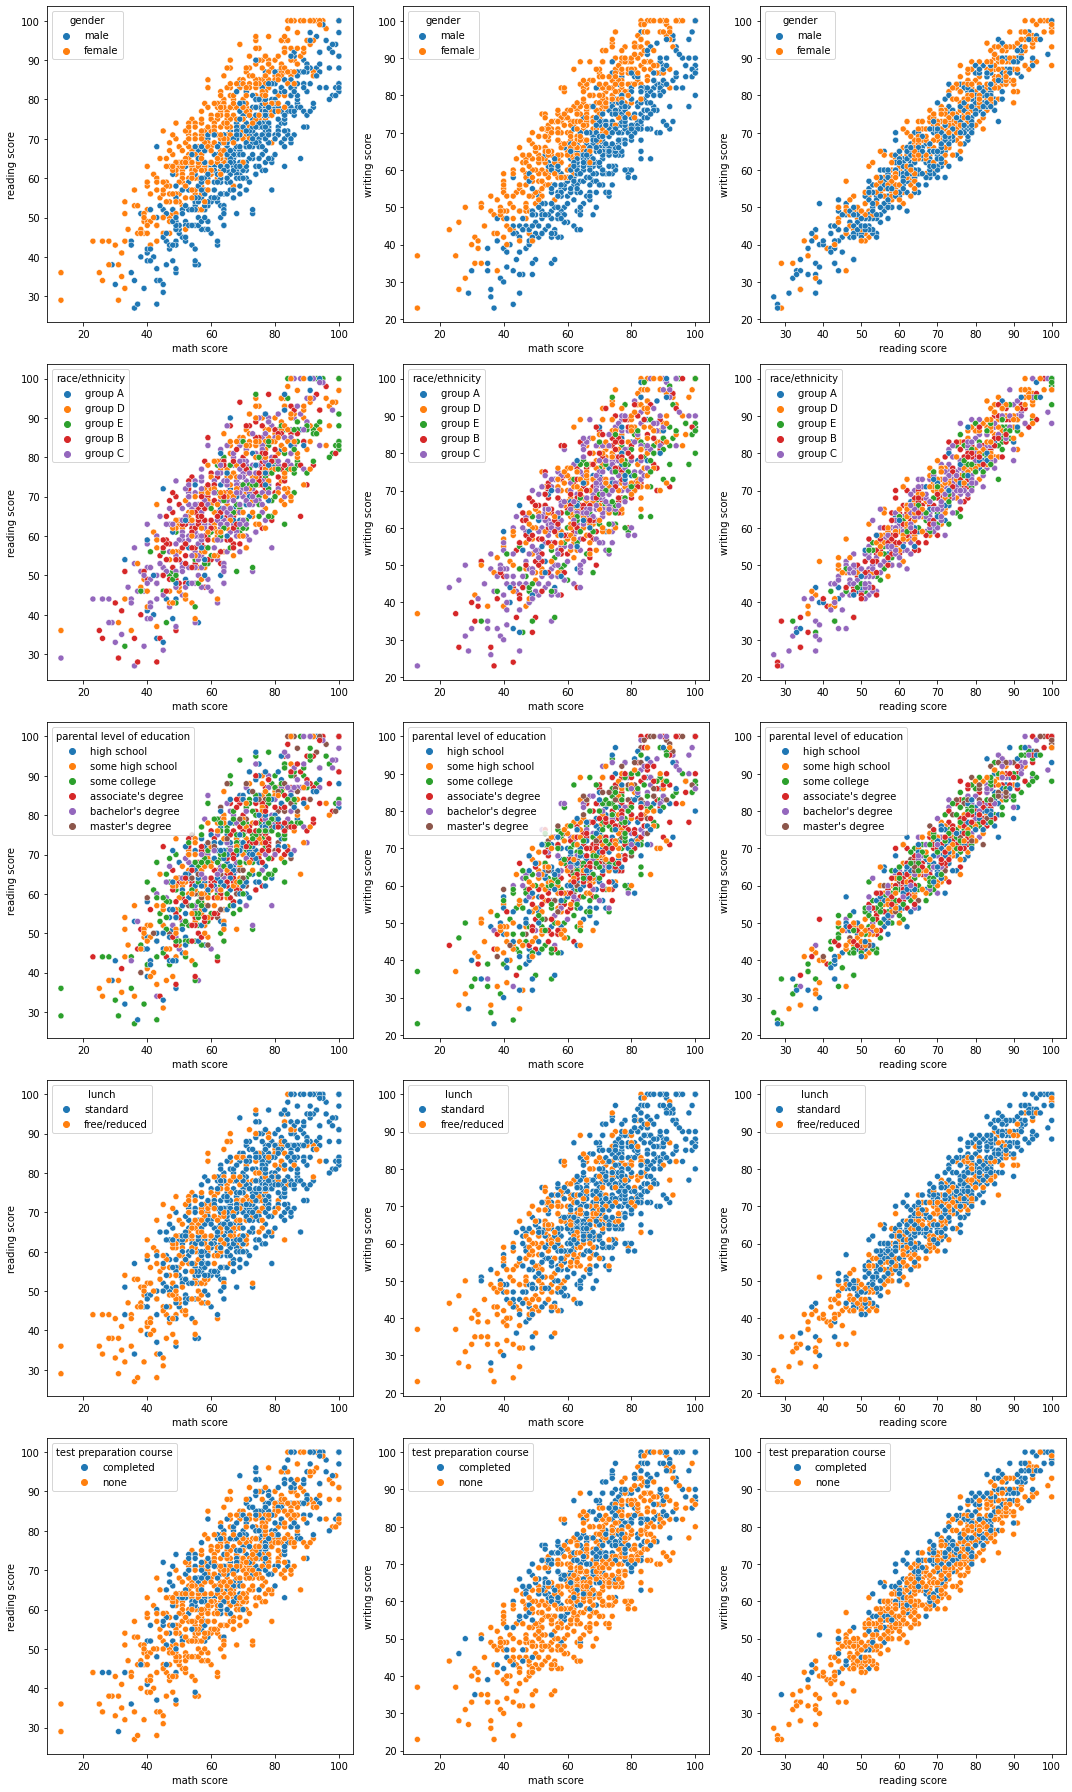

In [12]:
num_pairs = [[num_cols[0], num_cols[1]], 
         [num_cols[0], num_cols[2]], 
         [num_cols[1], num_cols[2]]]

fix, ax = plt.subplots(figsize=(15,25), nrows=5, ncols=3)

for i,p in enumerate(num_pairs):
    for j,hue in enumerate(cat_cols):
        sns.scatterplot(data=df, x=p[0], y=p[1], hue=hue, ax=ax[j,i])

plt.tight_layout()
plt.show()

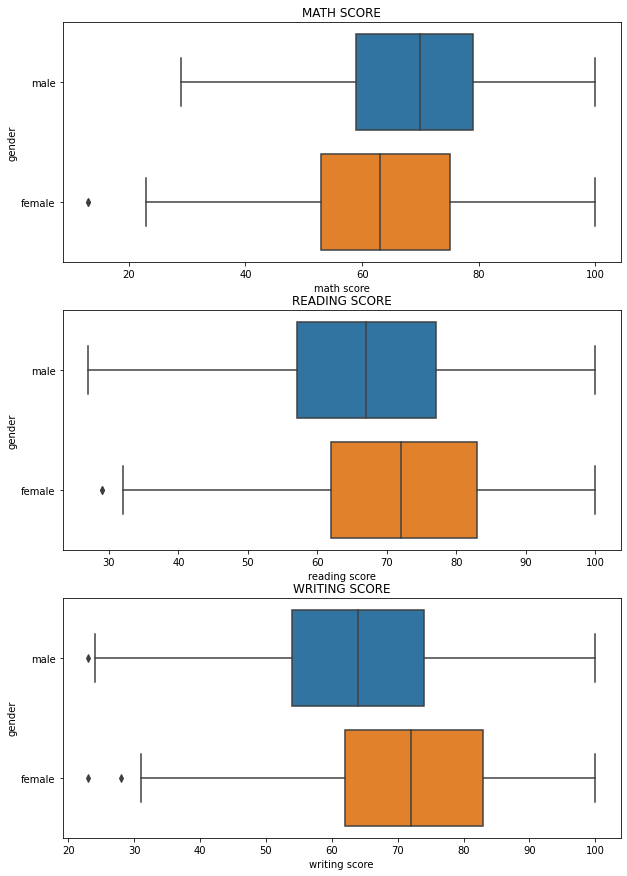

In [13]:
subjects_score=['math score', 'reading score', 'writing score']
fix, ax = plt.subplots(figsize=(10,15), nrows=3, ncols=1)
for i,sub in enumerate(subjects_score):
    sns.boxplot(data=df, x=sub,y= df['gender'], ax=ax[i])
    ax[i].set_title(sub.upper())

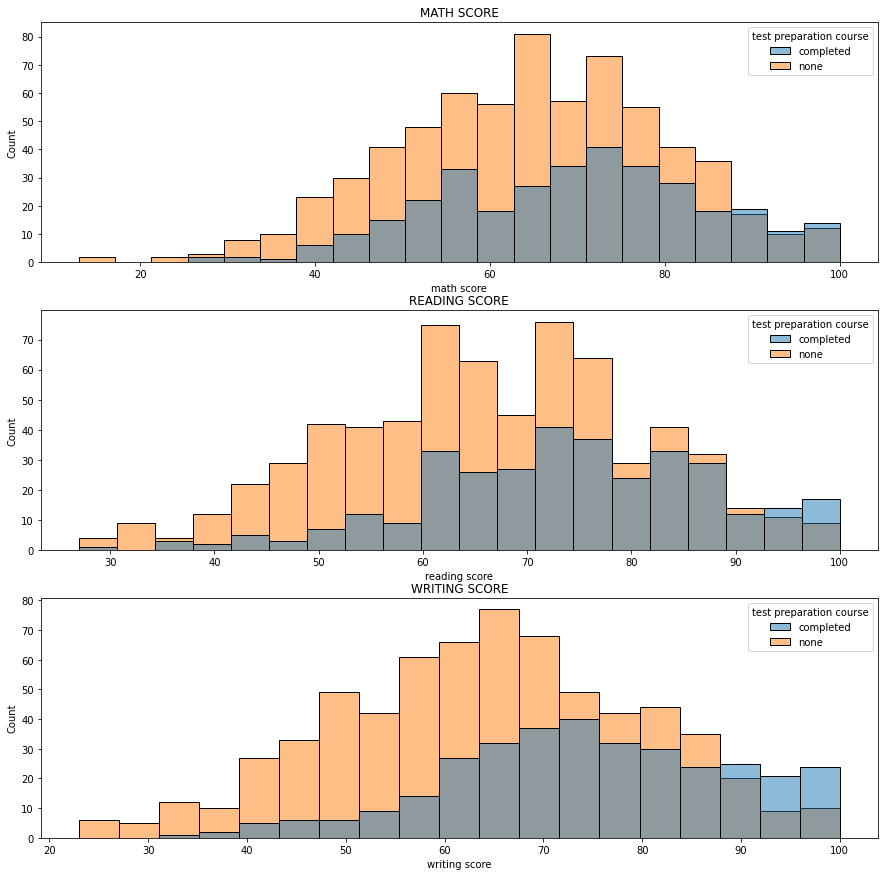

In [14]:
fix, ax = plt.subplots(figsize=(15,15), nrows=3, ncols=1)
for i,sub in enumerate(subjects_score):
    sns.histplot(data=df, x=sub, ax=ax[i],hue =df["test preparation course"])
    ax[i].set_title(sub.upper())

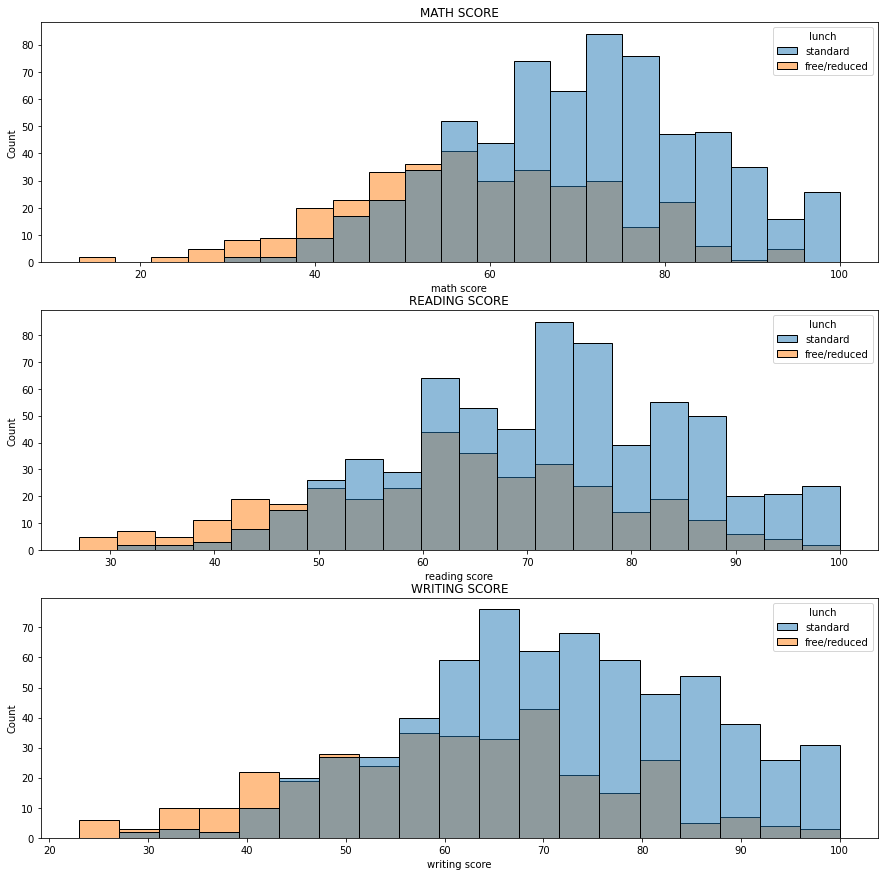

In [15]:
fix, ax = plt.subplots(figsize=(15,15), nrows=3, ncols=1)
for i,sub in enumerate(subjects_score):
    sns.histplot(data=df, x=sub, ax=ax[i],hue =df["lunch"])
    ax[i].set_title(sub.upper())

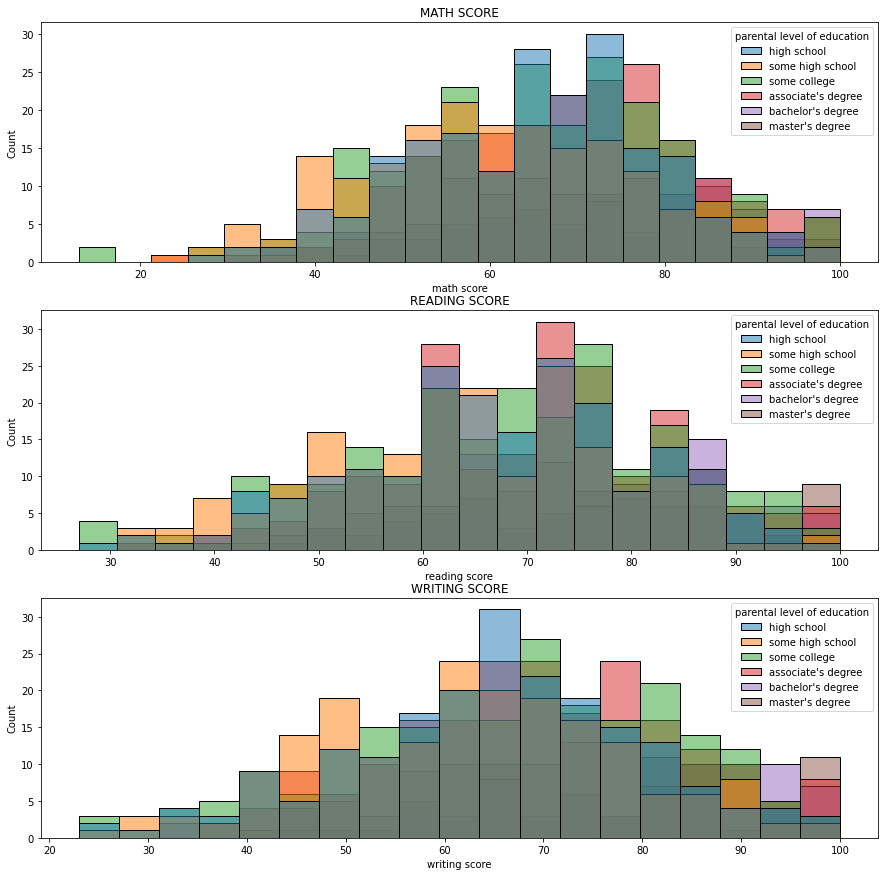

In [16]:
fix, ax = plt.subplots(figsize=(15,15), nrows=3, ncols=1)
for i,sub in enumerate(subjects_score):
    sns.histplot(data=df, x=sub, ax=ax[i],hue =df["parental level of education"])
    ax[i].set_title(sub.upper())

In [17]:
marks_relation=df.corr()
marks_relation

,math score,reading score,writing score
math score,1.000000,0.819398,0.805944
reading score,0.819398,1.000000,0.954274
writing score,0.805944,0.954274,1.000000


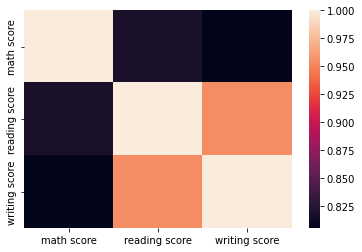

In [18]:
sns.heatmap(marks_relation)

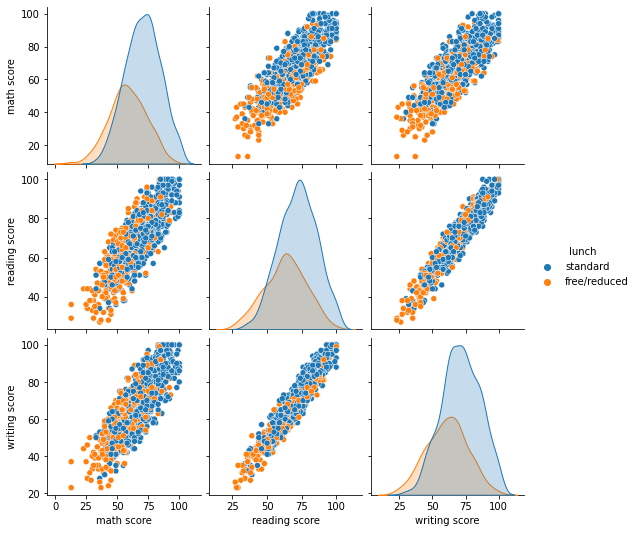

In [19]:
sns.pairplot(df,hue='lunch')

                             math score  reading score  writing score
parental level of education                                          
associate's degree            69.536946      70.985222      70.113300
bachelor's degree             71.491071      74.008929      74.410714
high school                   65.207921      67.400990      64.846535
master's degree               71.585714      75.428571      75.885714
some college                  65.297297      68.045045      66.734234
some high school              60.701571      64.408377      62.539267


<Figure size 1800x1800 with 0 Axes>

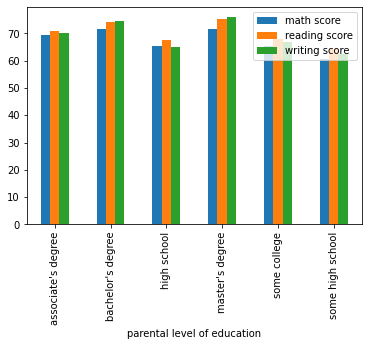

In [20]:
plt.figure(figsize=(25,25))
df1=df.groupby('parental level of education')[['math score','reading score','writing score']].mean()
print(df1)

df1.plot(kind='bar')

In [21]:
df3=df['race/ethnicity'].value_counts()
df3

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race/ethnicity, dtype: int64

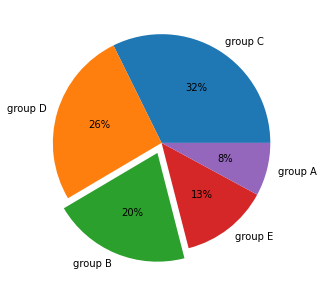

In [22]:
plt.figure(figsize=(10,5))
explode=[0,0,0.1,0,0]
plt.pie(df3.values,autopct='%.0f%%',labels=df3.index,explode=explode)
plt.show()

**REGRESSION**

In [23]:
df['total_scores'] = df['math score']+df['reading score']+df['writing score']
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_scores
0,male,group A,high school,standard,completed,67,67,63,197
1,female,group D,some high school,free/reduced,none,40,59,55,154
2,male,group E,some college,free/reduced,none,59,60,50,169
3,male,group B,high school,standard,none,77,78,68,223
4,male,group E,associate's degree,standard,completed,78,73,68,219


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
df['gender']=le.fit_transform(df['gender'])
df['race/ethnicity']=le.fit_transform(df['race/ethnicity'])
df['parental level of education']=le.fit_transform(df['parental level of education'])
df['lunch']=le.fit_transform(df['lunch'])
df['test preparation course']=le.fit_transform(df['test preparation course'])

In [26]:
X=df[['gender','race/ethnicity','parental level of education','lunch','test preparation course','math score','reading score','writing score']]
y=df['total_scores']

In [27]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,0,2,1,0,67,67,63
1,0,3,5,0,1,40,59,55
2,1,4,4,0,1,59,60,50
3,1,1,2,1,1,77,78,68
4,1,4,0,1,0,78,73,68
...,...,...,...,...,...,...,...,...
995,1,2,2,1,1,73,70,65
996,1,3,0,0,0,85,91,92
997,0,2,5,0,1,32,35,41
998,0,2,4,1,1,73,74,82


In [28]:
y

0      197
1      154
2      169
3      223
4      219
      ... 
995    208
996    268
997    108
998    229
999    187
Name: total_scores, Length: 1000, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [30]:
print(X_train)

     gender  race/ethnicity  parental level of education  lunch  \
105       0               3                            1      1   
68        1               1                            2      1   
479       1               2                            0      0   
399       0               0                            4      0   
434       1               2                            0      1   
..      ...             ...                          ...    ...   
835       0               1                            5      1   
192       1               4                            5      0   
629       1               2                            2      1   
559       1               4                            2      0   
684       1               2                            0      0   

     test preparation course  math score  reading score  writing score  
105                        1          70             78             82  
68                         1          79         

In [31]:
print(y_train)

105    230
68     203
479    150
399    192
434    196
      ... 
835    236
192    191
629    185
559    140
684    216
Name: total_scores, Length: 700, dtype: int64


In [32]:
X_train.shape

(700, 8)

In [33]:
X_test.shape

(300, 8)

In [34]:
y_test.shape

(300,)

In [35]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge

Ridge()

In [36]:
ridge.fit(X_train,y_train)

Ridge()

In [37]:
y_pred=ridge.predict(X_test)
print(y_pred)

[170.00010149 237.00001857 177.00005177 198.99994479 126.00012632
 159.00009282 199.00006146 225.99988532 190.00004483 288.99981016
  88.0002121  218.9999993  234.99998293 232.99999008 210.00000766
 178.00014812 236.99992606 166.00003817 252.99993872 243.99983015
 224.99979822 238.99982707 211.99998651 146.00017672 227.99991062
 183.00009206 157.00015078 200.00004165 195.99992308 154.00006882
 201.00002257 179.00007908 195.00005874 226.99984758 144.00013493
 265.99990676 179.00001888 176.00002983 206.99995743 220.00002915
 242.99991151 267.99982509 252.99989561 227.9998753  222.9998741
 186.00008995 201.99991129 224.99986555 189.00014019 262.99980859
 248.99986502 245.99986673 170.00008719 206.99994114 247.99994828
 196.00016427 210.00002542 213.99995775 229.99992119 246.99987424
 208.99996021 189.00006948 255.99990093 210.99995349 177.00001666
 144.00021958 259.99988721 212.00005133 191.00002861 155.0001967
 203.00001012 129.00025035 156.00010315 200.00000321 212.00000447
 175.9999944

In [38]:
print("Score on Test Data : ",ridge.score(X_test,y_test))
print("Score on Training Data : ",ridge.score(X_train,y_train))

Score on Test Data :  0.9999999999921425
Score on Training Data :  0.9999999999934769


In [39]:
from sklearn.tree import DecisionTreeRegressor
dec_reg=DecisionTreeRegressor(max_depth=5)
dec_reg

DecisionTreeRegressor(max_depth=5)

In [40]:
dec_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [41]:
y_pred_dec_reg=dec_reg.predict(X_train)
print(y_pred_dec_reg)

[234.13043478 187.95652174 147.38888889 193.08695652 194.06521739
 210.95       231.6        223.86538462 205.5625     175.16666667
 101.53333333 194.06521739 223.86538462 242.8        223.3
 139.93548387 193.08695652 231.6        158.76923077 179.18181818
 260.46774194 212.44       223.3        175.16666667 210.95
 175.16666667 204.70588235 231.6        194.06521739 245.8
 204.70588235 281.72727273 266.75       158.76923077 234.13043478
 175.16666667 234.13043478 242.58823529 223.86538462 187.95652174
 175.16666667 187.95652174 193.08695652 245.8        260.46774194
 139.93548387 139.93548387 179.18181818 281.72727273 204.70588235
 234.13043478 231.6        212.44       260.46774194 260.46774194
 210.95       194.06521739 101.53333333 158.76923077 184.70833333
 231.6        184.70833333 231.6        210.95       175.16666667
 234.13043478 194.06521739 179.18181818 242.58823529 187.95652174
 184.70833333 179.18181818 179.18181818 194.06521739 179.18181818
 130.7        204.70588235 130

In [42]:
print("Score on Test Data : ",dec_reg.score(X_test,y_test))
print("Score on Training Data : ",dec_reg.score(X_train,y_train))

Score on Test Data :  0.9673170377927085
Score on Training Data :  0.9830698619940315
